# ETL

data from:  https://csegroups.case.edu/bearingdatacenter/pages/welcome-case-western-reserve-university-bearing-data-center-website

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import os

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190612153550-0001
KERNEL_ID = a1cf7a55-2ecc-48e4-92a3-818d2eb36219


In [2]:
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/97.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/98.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/99.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/100.mat

--2019-06-12 15:35:53--  http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/97.mat
Resolving csegroups.case.edu (csegroups.case.edu)... 129.22.25.84
Connecting to csegroups.case.edu (csegroups.case.edu)|129.22.25.84|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3903344 (3.7M)
Saving to: '97.mat'

97.mat              100%[===================>]   3.72M  3.23MB/s    in 1.2s    

2019-06-12 15:35:54 (3.23 MB/s) - '97.mat' saved [3903344/3903344]

--2019-06-12 15:35:55--  http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/98.mat
Resolving csegroups.case.edu (csegroups.case.edu)... 129.22.25.84
Connecting to csegroups.case.edu (csegroups.case.edu)|129.22.25.84|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7742720 (7.4M)
Saving to: '98.mat'

98.mat              100%[===================>]   7.38M  6.79MB/s    in 1.1s    

2019-06-12 15:35:56 (6.79 MB/s) - '98.mat' saved [7742720/7742

In [3]:
!mkdir  cwr_healthy

mkdir: cannot create directory 'cwr_healthy': File exists


In [4]:
!mv *.mat cwr_healthy/

In [5]:
!ls cwr_healthy/

100.mat  97.mat  98.mat  99.mat


In [6]:
#check one file
mlf = sio.loadmat('./cwr_healthy/100.mat')

In [7]:
mlf

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:25:48 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X100_DE_time': array([[ 0.01460308],
        [ 0.05444862],
        [ 0.10764554],
        ...,
        [-0.02357354],
        [ 0.00521538],
        [ 0.04777292]]),
 'X100_FE_time': array([[ 0.19292182],
        [ 0.16436364],
        [ 0.09081091],
        ...,
        [ 0.10930182],
        [ 0.05218545],
        [-0.00452   ]]),
 'X100RPM': array([[1725]], dtype=uint16)}

In [8]:
def read_folder(folder):
    data = 'dummy'
    skip = False
    for file in os.listdir(folder):
        file_id = file[:-4]
        mat_file_dict = sio.loadmat(folder+file) #function to read matlab files
        del data
        for key, value in mat_file_dict.items():
            if 'DE_time' in key or 'FE_time' in key:
                a = np.array(mat_file_dict[key])
                try:
                    data
                except NameError:
                    data = a
                else:
                    if (data.shape[0] != a.shape[0]):
                        print('skipping ' + file_id)
                        skip = True
                        continue
                    data = np.hstack((data,a))
        if skip:
            skip=False
            continue
        id = np.repeat(file_id,data.shape[0])
        id.shape = (id.shape[0],1)
        data = np.hstack((id,data))
        if data.shape[1] == 2:
            zeros = np.repeat(float(0),data.shape[0])
            zeros.shape =(data.shape[0],1)
            data = np.hstack((data,zeros))
        try:
            result
        except NameError:
            result = data
        else:
            result = np.vstack((result,data))
    return result

In [9]:
result_healthy = read_folder('./cwr_healthy/')

skipping 99
skipping 99


In [10]:
pdf = pd.DataFrame(result_healthy)

In [11]:
pdf.to_csv('result_healthy_pandas.csv', header=False, index=True)

In [12]:
!head result_healthy_pandas.csv

0,100,0.014603076923076923,0.19292181818181817
1,100,0.05444861538461539,0.16436363636363635
2,100,0.10764553846153846,0.09081090909090908
3,100,0.13372246153846154,0.08649636363636364
4,100,0.11265230769230769,0.09923454545454545
5,100,0.08240307692307691,0.09307090909090908
6,100,0.08699261538461538,0.08197636363636364
7,100,0.11056615384615384,0.03307818181818182
8,100,0.12767261538461538,0.01171090909090909
9,100,0.11348676923076922,0.02218909090909091


In [13]:
#!for url in `curl -s csegroups.case.edu/bearingdatacenter/pages/12k-drive-end-bearing-fault-data |grep mat |grep http |awk -F'href="' '{print $2}' |awk -F'">' '{print $1}'`; do wget $url; done
#!for url in `curl -s csegroups.case.edu/bearingdatacenter/pages/48k-drive-end-bearing-fault-data |grep mat |grep http |awk -F'href="' '{print $2}' |awk -F'">' '{print $1}'`; do wget $url; done
#!for url in `curl -s csegroups.case.edu/bearingdatacenter/pages/12k-fan-end-bearing-fault-data |grep mat |grep http |awk -F'href="' '{print $2}' |awk -F'">' '{print $1}'`; do wget $url; done
#!mkdir cwr_faulty
#!mv *.mat cwr_faulty/

In [14]:
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/105.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/106.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/107.mat
!wget http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/108.mat

--2019-06-12 15:36:12--  http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/105.mat
Resolving csegroups.case.edu (csegroups.case.edu)... 129.22.25.84
Connecting to csegroups.case.edu (csegroups.case.edu)|129.22.25.84|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2910768 (2.8M)
Saving to: '105.mat'

105.mat             100%[===================>]   2.78M  6.57MB/s    in 0.4s    

2019-06-12 15:36:13 (6.57 MB/s) - '105.mat' saved [2910768/2910768]

--2019-06-12 15:36:13--  http://csegroups.case.edu/sites/default/files/bearingdatacenter/files/Datafiles/106.mat
Resolving csegroups.case.edu (csegroups.case.edu)... 129.22.25.84
Connecting to csegroups.case.edu (csegroups.case.edu)|129.22.25.84|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2928192 (2.8M)
Saving to: '106.mat'

106.mat             100%[===================>]   2.79M  6.57MB/s    in 0.4s    

2019-06-12 15:36:14 (6.57 MB/s) - '106.mat' saved [292819

In [15]:
!mkdir cwr_faulty
!mv *.mat cwr_faulty/

mkdir: cannot create directory 'cwr_faulty': File exists


In [16]:
!ls cwr_faulty/

105.mat  106.mat  107.mat  108.mat


In [17]:
result_faulty = read_folder('./cwr_faulty/')

In [18]:
pdf = pd.DataFrame(result_faulty)

In [19]:
pdf.to_csv('result_faulty_pandas.csv', header=False, index=True)

In [20]:
df_healthy = spark.read.csv('result_healthy_pandas.csv')
df_healthy.createOrReplaceTempView('df_healthy')

In [21]:
df_faulty = spark.read.csv('result_faulty_pandas.csv')
df_faulty.createOrReplaceTempView('df_faulty')

In [22]:
spark.sql('select _c1, count(_c1) as cn from df_healthy group by _c1 order by cn asc').show()

+---+------+
|_c1|    cn|
+---+------+
| 97|243938|
| 98|483903|
|100|485643|
+---+------+



In [23]:
spark.sql('select _c1, count(_c1) as cn from df_faulty group by _c1 order by cn asc').show()

+---+------+
|_c1|    cn|
+---+------+
|105|121265|
|106|121991|
|107|122136|
|108|122917|
+---+------+



In [24]:
# The code was removed by Watson Studio for sharing.

In [25]:
df_healthy.write.parquet(cos.url('cwr_healthy.parquet', 'advancedatasci-donotdelete-pr-bvizfkp0o2ej2y'))

AnalysisException: 'path cos://advancedatasci-donotdelete-pr-bvizfkp0o2ej2y.os_45b77029797b4322b732418ac53a105b_configs/cwr_healthy.parquet already exists.;'

In [ ]:
df_faulty.write.parquet(cos.url('cwr_faulty.parquet', 'advancedatasci-donotdelete-pr-bvizfkp0o2ej2y'))

# Keras

In [26]:
df_healthy = spark.read.parquet(cos.url('cwr_healthy.parquet', 'advancedatasci-donotdelete-pr-bvizfkp0o2ej2y'))
df_healthy.createOrReplaceTempView('df_healthy')

In [27]:
df_faulty = spark.read.parquet(cos.url('cwr_faulty.parquet', 'advancedatasci-donotdelete-pr-bvizfkp0o2ej2y'))
df_faulty.createOrReplaceTempView('df_faulty')

In [28]:
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib inline

Using TensorFlow backend.


In [38]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [41]:
timesteps = 100
dim = 2
lossHistory = LossHistory()
# design network

model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')

def train(data):
    model.fit(data, data, epochs=5, batch_size=72, validation_data=(data, data), verbose=1, shuffle=False,callbacks=[lossHistory])

def score(data):
    yhat =  model.predict(data)
    return yhat

In [42]:
def create_trimmed_recording(df,file_id):
    recording = np.array(df.orderBy(df['_c0']).where(df['_c1'] == file_id).select('_c2', '_c3').rdd.map(lambda row: np.array([row._c2, row._c3])).collect())
    samples = len(recording)
    trim = samples % 100
    recording_trimmed = recording[:samples-trim]
    recording_trimmed.shape = (int((samples-trim)/timesteps),timesteps,dim)
    return recording_trimmed

In [43]:
file_ids = spark.sql('select distinct _c1 from df_healthy').rdd.map(lambda row : row._c1).collect()
start = time.time()
for file_id in file_ids:
    recording_trimmed = create_trimmed_recording(df_healthy,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
healthy_losses = lossHistory.losses

Instructions for updating:
Use tf.cast instead.


Staring training on 98
Train on 4839 samples, validate on 4839 samples
Epoch 1/5
4839/4839 [==============================] - 164s 34ms/step - loss: 0.0392 - val_loss: 0.0304
Epoch 2/5
4839/4839 [==============================] - 165s 34ms/step - loss: 0.0201 - val_loss: 0.0113
Epoch 3/5
4839/4839 [==============================] - 160s 33ms/step - loss: 0.0071 - val_loss: 0.0048
Epoch 4/5
4839/4839 [==============================] - 158s 33ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 5/5
4839/4839 [==============================] - 155s 32ms/step - loss: 0.0026 - val_loss: 0.0023
Finished training on 98 after 841.6278133392334 seconds
Staring training on 100
Train on 4856 samples, validate on 4856 samples
Epoch 1/5
4856/4856 [==============================] - 152s 31ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 2/5
4856/4856 [==============================] - 152s 31ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 3/5
4856/4856 [==============================] - 154s 32ms/step - l

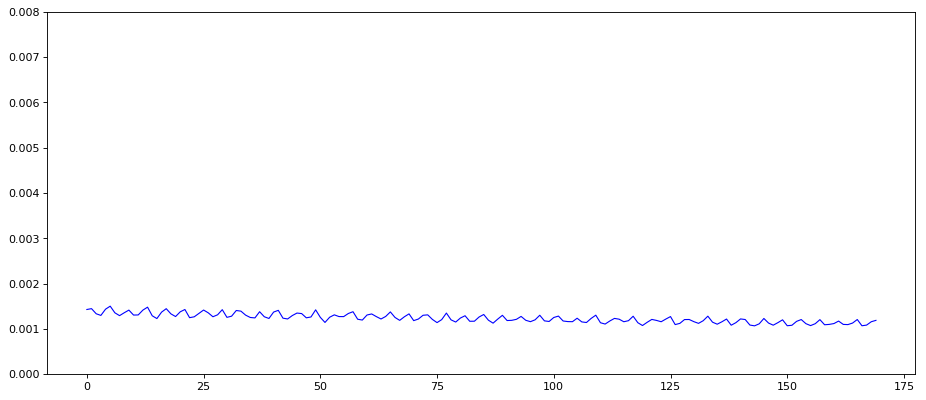

In [44]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses, '-', color='blue', animated = True, linewidth=1)

In [45]:
#file_ids = spark.sql('select distinct _c1 from df_healhty').rdd.map(lambda row : row._c1).collect()
start = time.time()
for file_id in [105]:
    recording_trimmed = create_trimmed_recording(df_faulty,file_id)
    print("Staring training on %s" % (file_id))
    train(recording_trimmed)
    print("Finished training on %s after %s seconds" % (file_id,time.time()-start))

print("Finished job on after %s seconds" % (time.time()-start))
faulty_losses = lossHistory.losses

Staring training on 105
Train on 1212 samples, validate on 1212 samples
Epoch 1/5
1212/1212 [==============================] - 40s 33ms/step - loss: 0.0083 - val_loss: 0.0070
Epoch 2/5
1212/1212 [==============================] - 37s 30ms/step - loss: 0.0064 - val_loss: 0.0060
Epoch 3/5
1212/1212 [==============================] - 38s 32ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 4/5
1212/1212 [==============================] - 35s 29ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 5/5
1212/1212 [==============================] - 43s 35ms/step - loss: 0.0049 - val_loss: 0.0047
Finished training on 105 after 222.44874596595764 seconds
Finished job on after 222.44898200035095 seconds


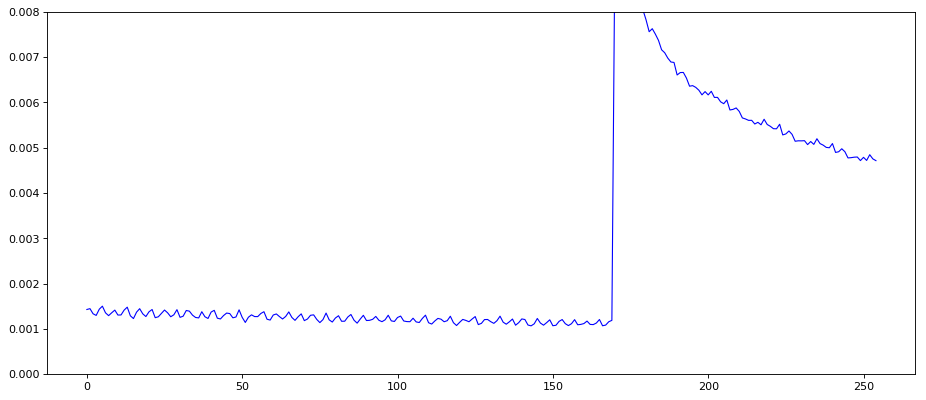

In [47]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(healthy_losses+faulty_losses)
plt.ylim(0,0.008)
ax.plot(range(0,size), healthy_losses+faulty_losses, '-', color='blue', animated = True, linewidth=1)